# Lectures in Statistics

inspired by series of lectures provided here: https://www.unc.edu/courses/2010fall/ecol/563/001/docs/lectures/lecture1.htm

## Lecture 1

### Simple linear regression

The relationship between a response variable $y$ and a predictor $x$ is assumed to be:
$$
y = \beta_0 + \beta_1 x + \epsilon
$$
Typically we assume that the error $\epsilon$ has a normal distribution around zero: 
$$\epsilon \sim N(0, \sigma^2)$$

In [2]:
import scipy.stats as stats
import numpy as np

from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline

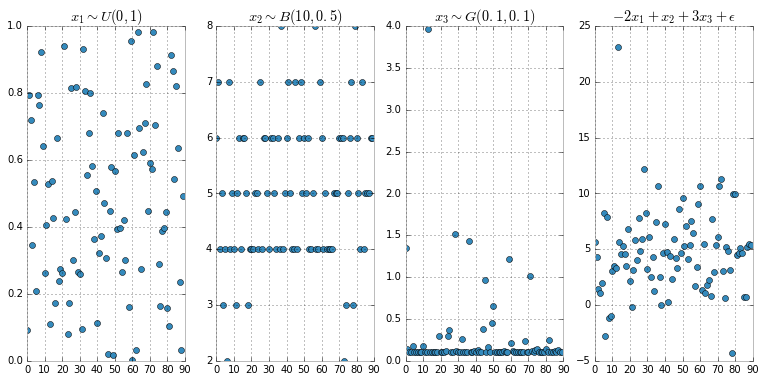

In [3]:
# Let's generate three types of data:
# * uniformly,
# * binomially and
# * gamma distributed
x1 = stats.uniform.rvs(size=90)
x2 = stats.binom.rvs(10, .5, size=90)
x3 = stats.gamma.rvs(.1, .1, size=90)
eps = stats.norm.rvs(0, 3, size=90)

data = -2 * x1 + x2 + 3 * x3 + eps

figsize(13, 6)
plt.subplot(1,4,1)
plt.plot(x1, 'o')
plt.title(r'$x_1 \sim U(0, 1)$')

plt.subplot(1,4,2)
plt.plot(x2, 'o')
plt.title(r'$x_2 \sim B(10, 0.5)$')

plt.subplot(1,4,3)
plt.plot(x3, 'o')
plt.title(r'$x_3 \sim G(0.1, 0.1)$')

plt.subplot(1,4,4)
plt.plot(data, 'o')
plt.title(r'$-2x_1 + x_2 + 3x_3 + \epsilon$')

Slope (1): -2.555
Intercept (1): 5.97
Stderr (1): 1.43

Slope (3): 4.804
Intercept (3): 3.53
Stderr (3): 0.62


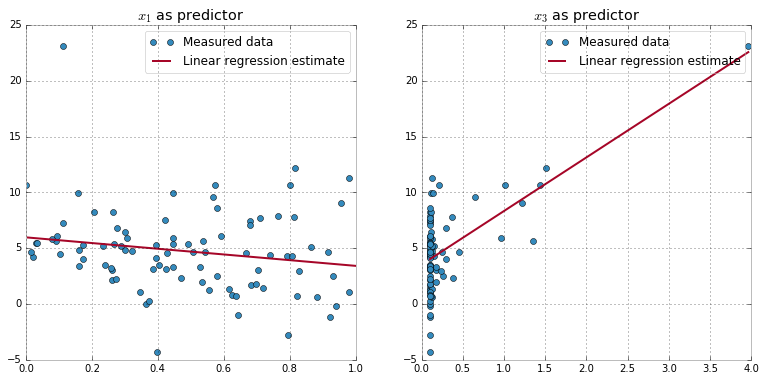

In [4]:
# we try linear regression now
slope, intercept, r_value, p_value, std_err = stats.linregress(x1, data)
print 'Slope (1): %.3f' % slope
print 'Intercept (1): %.2f' % intercept
print 'Stderr (1): %.2f' % std_err

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(x1, data, 'o', label='Measured data')
x_est = np.linspace(0, 1, 100)
y_est = intercept + x_est * slope
plt.hold(True)
plt.plot(x_est, y_est, label='Linear regression estimate')
plt.legend()
plt.title(r'$x_1$ as predictor')

slope, intercept, r_value, p_value, std_err = stats.linregress(x3, data)
print
print 'Slope (3): %.3f' % slope
print 'Intercept (3): %.2f' % intercept
print 'Stderr (3): %.2f' % std_err

plt.subplot(1, 2, 2)
plt.plot(x3, data, 'o', label='Measured data')
x_est = np.linspace(min(x3), max(x3), 100)
y_est = intercept + x_est * slope
plt.hold(True)
plt.plot(x_est, y_est, label='Linear regression estimate')
plt.legend()
plt.title(r'$x_3$ as predictor')

Slope (1): -2.555
Intercept (1): 5.972
Residual sum of squares (1): 13.19
Variance score (1): 0.03

Slope (3): 4.804
Intercept (3): 3.533
Residual sum of squares (3): 8.09
Variance score (3): 0.41


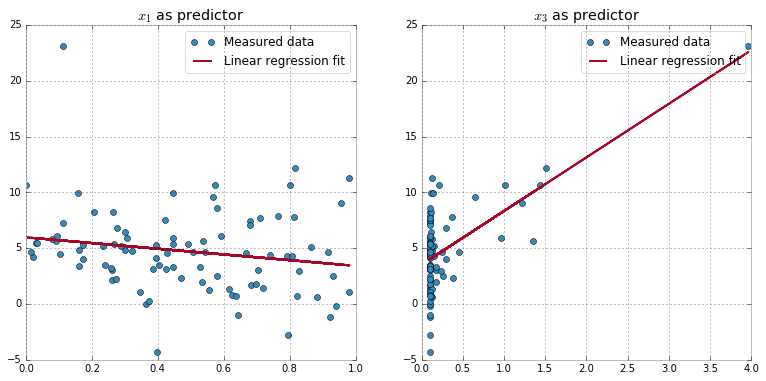

In [5]:
# now we try the same thing, but with sklearn
from sklearn import datasets, linear_model

regr1 = linear_model.LinearRegression()

x1_sk = x1[:, np.newaxis]
data_sk = data[:, np.newaxis]
regr1.fit(x1_sk, data_sk)

regr3 = linear_model.LinearRegression()

x3_sk = x3[:, np.newaxis]
regr3.fit(x3_sk, data_sk)

# The coefficients
print("Slope (1): %.3f" % regr1.coef_[0])
print("Intercept (1): %.3f" % regr1.intercept_)
# The mean square error
print("Residual sum of squares (1): %.2f"
      % np.mean((regr1.predict(x1_sk) - data_sk) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score (1): %.2f' % regr1.score(x1_sk, data_sk))
print
# The coefficients
print("Slope (3): %.3f" % regr3.coef_[0])
print("Intercept (3): %.3f" % regr3.intercept_)
# The mean square error
print("Residual sum of squares (3): %.2f"
      % np.mean((regr3.predict(x3_sk) - data_sk) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score (3): %.2f' % regr3.score(x3_sk, data_sk))

# Plot outputs
plt.subplot(1, 2, 1)
plt.plot(x1_sk, data_sk, 'o', label='Measured data')
plt.plot(x1_sk, regr1.predict(x1_sk), label='Linear regression fit')
plt.legend()
plt.title(r'$x_1$ as predictor')

plt.subplot(1, 2, 2)
plt.plot(x3_sk, data_sk, 'o', label='Measured data')
plt.plot(x3_sk, regr3.predict(x3_sk), label='Linear regression fit')
plt.legend()
plt.title(r'$x_3$ as predictor')

In [6]:
# Now we do the same in statsmodels package, which
# emulates the R way of fitting and model prediction
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# We first convert data to pandas dataframe structure
d = {'x1': pd.Series(x1),
     'x2': pd.Series(x2),
     'x3': pd.Series(x3),
     'eps': pd.Series(eps),
     'data': pd.Series(data)}
df = pd.DataFrame(d)

lm_x1 = smf.ols('data ~ x1', data=df).fit()
print lm_x1.summary()

lm_x3 = smf.ols('data ~ x3', data=df).fit()
print lm_x3.summary()

                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.174
Date:                Thu, 26 May 2016   Prob (F-statistic):             0.0783
Time:                        15:50:35   Log-Likelihood:                -243.78
No. Observations:                  90   AIC:                             491.6
Df Residuals:                      88   BIC:                             496.6
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.9722      0.789      7.567      0.000         4.404     7.541
x1            -2.5545      1.434     -1.781      0.0

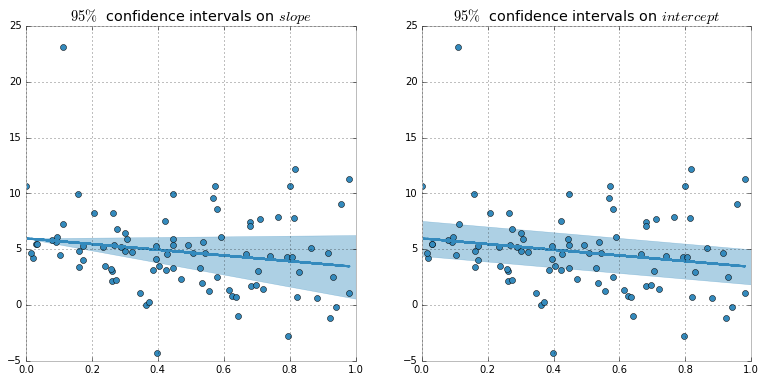

In [7]:
# Let's plot the 95% intervals on intercept and the slope

_int = lm_x1.params[0]
_slope = lm_x1.params[1]

plt.figure()
plt.subplot(1,2,1)
plt.plot(x1, data, 'o')
x1_est = np.linspace(0, 1, 100)
plt.plot(x1, _int + _slope * x1, color="#348ABD")
plt.fill_between(x1_est, _int + lm_x1.conf_int()[0][1] * x1_est, _int + lm_x1.conf_int()[1][1] * x1_est, color="#348ABD", alpha=0.4)
plt.title(r'$95\%$  confidence intervals on $slope$')

plt.subplot(1,2,2)
plt.plot(x1, data, 'o')
plt.plot(x1, _int + _slope * x1, color="#348ABD")
plt.fill_between(x1_est, lm_x1.conf_int()[0][0] + _slope * x1_est, lm_x1.conf_int()[1][0] + _slope * x1_est, color="#348ABD", alpha=0.4)
plt.title(r'$95\%$  confidence intervals on $intercept$');


### Multiple regression

In [8]:
lm_ml = smf.ols('data ~ x1 + x2 + x3', data=df).fit()
print lm_ml.summary()

                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     39.36
Date:                Thu, 26 May 2016   Prob (F-statistic):           4.16e-16
Time:                        15:50:40   Log-Likelihood:                -206.48
No. Observations:                  90   AIC:                             421.0
Df Residuals:                      86   BIC:                             431.0
Df Model:                           3                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.9785      1.157     -0.846      0.400        -3.279     1.322
x1            -1.9984      0.960     -2.082      0.0

#### Coefficient of determination

**R-squared**: In statistics, the coefficient of determination, denoted $R^2$ or $r^2$ and pronounced R squared, is a number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable.

<img src="files/images/r_squared.png" width="50%" height="50%">
<center>Image taken from wikipedia: https://en.wikipedia.org/wiki/Coefficient_of_determination</center>

Let $\bar{y}$ be the mean of the observed data:
$$
\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i
$$

One simple measure of the variability in the data can simply be the sum of squares of differences of the datapoints to the mean:
$$
SS_{tot} = \sum_i (y_i - \bar{y})^2
$$

After we perform the regression, we can measure the new distances of the data points to the regression curve:
$$
SS_{res} = \sum_i (y_i - f_i)^2 = \sum_i e_i^2
$$

Then, the coefficient of determination becomes:
$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

The better the linear regression fits the data in the comparison to the simple average, the closer the value of $R^2$ to 1.

As we can see from three used examples of fitting (observe the three $R^2$ values in the summaries above), the multiple regression model can account for more of the variance in the data than either of the simple linear regression models.

#### F-test

An F-test is any statistical test in which the test statistic has an F-distribution under the null hypothesis. It is most often used when comparing statistical models that have been fitted to a data set, in order to identify the model that best fits the population from which the data were sampled. Exact "F-tests" mainly arise when the models have been fitted to the data using least squares.

The influence of an observation can be thought of in terms of how much the predicted scores for other observations would differ if the observation in question were not included. Cook's D is a good measure of the influence of an observation and is proportional to the sum of the squared differences between predictions made with all observations in the analysis and predictions made leaving out the observation in question. If the predictions are the same with or without the observation in question, then the observation has no influence on the regression model. If the predictions differ greatly when the observation is not included in the analysis, then the observation is influential.

                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     20.91
Date:                Thu, 26 May 2016   Prob (F-statistic):           8.77e-15
Time:                        15:50:57   Log-Likelihood:                -203.94
No. Observations:                  90   AIC:                             421.9
Df Residuals:                      83   BIC:                             439.4
Df Model:                           6                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9854      2.586      0.381      0.704        -4.158     6.129
x1            -7.9829      4.331     -1.843      0.0

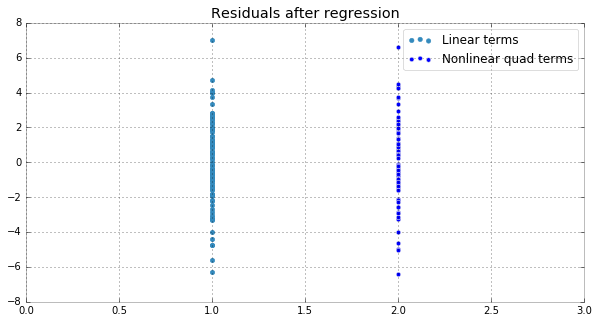

In [9]:
# Let's now plot the residuals:
resid = lm_ml.resid

figsize(10, 5)
plt.figure()
plt.scatter([1]*len(resid), resid, color='#348ABD', label='Linear terms')
plt.xlim(0, 3)
plt.title('Residuals after regression')

# We can try including nonlinear terms and then evaluate
# the residuals

lm_nonlin = smf.ols('data ~ x1 + x2 + x3 + x1:x2 + x1:x3 + x2:x3', data=df).fit()
plt.hold(True)
resid_nonline = lm_nonlin.resid
plt.scatter([2]*len(resid_nonline), resid_nonline, label='Nonlinear quad terms')
plt.legend()

print lm_nonlin.summary()

We can notice that there is not apparent benefit to our model by adding nonlinear terms. The $R^2$ stays the same - we cannot account for any additional variability in the data by including these terms. However, there is slight reduction in the probability with which we can discard the null hypothesis of all estimated constants being zero.

#### ANOVA

Analysis of variance (ANOVA) is a collection of statistical models used to analyze the differences among group means and their associated procedures (such as "variation" among and between groups), developed by statistician and evolutionary biologist Ronald Fisher. In the ANOVA setting, the observed variance in a particular variable is partitioned into components attributable to different sources of variation. In its simplest form, ANOVA provides a statistical test of whether or not the means of several groups are equal, and therefore generalizes the t-test to more than two groups. ANOVAs are useful for comparing (testing) three or more means (groups or variables) for statistical significance. It is conceptually similar to multiple two-sample t-tests, but is less conservative (results in less type I error) and is therefore suited to a wide range of practical problems.

The analysis of variance can be used as an exploratory tool to explain observations. A dog show provides an example. A dog show is not a random sampling of the breed: it is typically limited to dogs that are adult, pure-bred, and exemplary. A histogram of dog weights from a show might plausibly be rather complex. Suppose we wanted to predict the weight of a dog based on a certain set of characteristics of each dog. Before we could do that, we would need to explain the distribution of weights by dividing the dog population into groups based on those characteristics. A successful grouping will split dogs such that (a) each group has a low variance of dog weights (meaning the group is relatively homogeneous) and (b) the mean of each group is distinct (if two groups have the same mean, then it isn't reasonable to conclude that the groups are, in fact, separate in any meaningful way).

In [10]:
# model comparison 
from statsmodels.stats.api import anova_lm

print(anova_lm(lm_x1, typ=2))
print(anova_lm(lm_x3))
print(anova_lm(lm_ml))
print(anova_lm(lm_nonlin))

               sum_sq  df        F    PR(>F)
x1          42.809969   1  3.17356  0.078289
Residual  1187.082226  88      NaN       NaN
          df      sum_sq     mean_sq          F        PR(>F)
x3         1  501.712966  501.712966  60.631695  1.261124e-11
Residual  88  728.179229    8.274764        NaN           NaN
          df      sum_sq     mean_sq          F        PR(>F)
x1         1   42.809969   42.809969   7.103939  9.185266e-03
x2         1  290.503476  290.503476  48.206505  6.863188e-10
x3         1  378.322987  378.322987  62.779383  7.557268e-12
Residual  86  518.255763    6.026230        NaN           NaN
          df      sum_sq     mean_sq          F        PR(>F)
x1         1   42.809969   42.809969   7.255128  8.552806e-03
x2         1  290.503476  290.503476  49.232458  5.670410e-10
x3         1  378.322987  378.322987  64.115482  6.294677e-12
x1:x2      1    9.967517    9.967517   1.689224  1.973015e-01
x1:x3      1    4.447445    4.447445   0.753721  3.878039e-

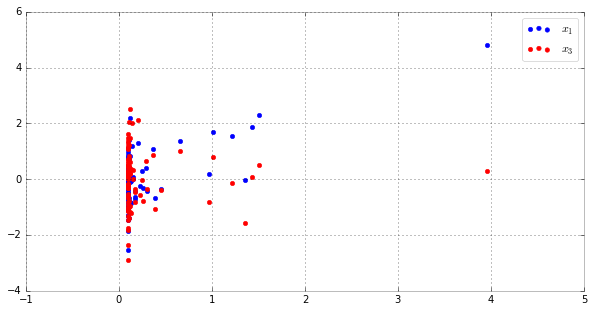

In [11]:
infl = lm_ml.get_influence()

infl_x1 = lm_x1.get_influence().resid_studentized_internal
infl_x3 = lm_x3.get_influence().resid_studentized_internal
infl_ml = lm_ml.get_influence().resid_studentized_internal
infl_nonlin = lm_nonlin.get_influence().resid_studentized_internal

plt.figure()
plt.subplot()
plt.hold(True)
plt.scatter(x3, infl_x1, color='b', label=r'$x_1$')
plt.scatter(x3, infl_x3, color='r', label=r'$x_3$')
plt.legend()

We can see that the two further points are more of the outliers in the first model, where the $x_1$ is the independent variable than in the second, where $x_3$ is the independent variable.